## Load the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import and check the dataset

In [7]:
df = pd.read_csv("indian_startup_funding.csv")
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,9/1/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [8]:
df.shape

(3044, 10)

## Inspect and Rename Columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [10]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [11]:
df.columns = ['Sr_No', 'Date', 'Startup_Name', 'Industry_Vertical', 'SubVertical',
              'City', 'Investors_Name', 'Investment_Type', 'Amount_USD', 'Remarks']


In [12]:
df.head(2)

,Sr_No,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,Investment_Type,Amount_USD,Remarks
0,1,9/1/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


## Convert Date to datetime Format

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')


In [14]:
# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr_No              3044 non-null   int64         
 1   Date               3036 non-null   datetime64[ns]
 2   Startup_Name       3044 non-null   object        
 3   Industry_Vertical  2873 non-null   object        
 4   SubVertical        2108 non-null   object        
 5   City               2864 non-null   object        
 6   Investors_Name     3020 non-null   object        
 7   Investment_Type    3040 non-null   object        
 8   Amount_USD         2084 non-null   object        
 9   Remarks            419 non-null    object        
 10  Year               3036 non-null   float64       
 11  Month              3036 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 285.5+ KB


In [16]:
df.head(2)

,Sr_No,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,Investment_Type,Amount_USD,Remarks,Year,Month
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020.0,1.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020.0,1.0


## Clean Amount Column (₹ Crores format)

In [17]:
# Remove commas and convert to numeric
df['Amount_USD'] = df['Amount_USD'].astype(str).str.replace(',', '')
df['Amount_USD'] = pd.to_numeric(df['Amount_USD'], errors='coerce')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr_No              3044 non-null   int64         
 1   Date               3036 non-null   datetime64[ns]
 2   Startup_Name       3044 non-null   object        
 3   Industry_Vertical  2873 non-null   object        
 4   SubVertical        2108 non-null   object        
 5   City               2864 non-null   object        
 6   Investors_Name     3020 non-null   object        
 7   Investment_Type    3040 non-null   object        
 8   Amount_USD         2065 non-null   float64       
 9   Remarks            419 non-null    object        
 10  Year               3036 non-null   float64       
 11  Month              3036 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 285.5+ KB


In [19]:
# Check for missing or non-numeric values
df['Amount_USD'].isnull().sum()


np.int64(979)

## Handle Missing Values

In [20]:
# View missing values
df.isnull().sum()


Sr_No                   0
Date                    8
Startup_Name            0
Industry_Vertical     171
SubVertical           936
City                  180
Investors_Name         24
Investment_Type         4
Amount_USD            979
Remarks              2625
Year                    8
Month                   8
dtype: int64

In [21]:
# Drop rows where Date or Amount is missing
df = df.dropna(subset=['Date', 'Amount_USD'])


In [22]:
df.shape

(2059, 12)

## Explore & Clean Cities / Industry Tags

In [23]:
df['City'] = df['City'].str.strip().str.title()
df['Industry_Vertical'] = df['Industry_Vertical'].str.strip().str.title()
df['Investment_Type'] = df['Investment_Type'].str.strip().str.title()


In [36]:
df.head(2)

,Sr_No,Date,Startup_Name,Industry_Vertical,SubVertical,City,Investors_Name,Investment_Type,Amount_USD,Remarks,Year,Month
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN,2020.0,1.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN,2020.0,1.0


In [37]:
df.to_csv('cleaned_startup_funding.csv', index=False)

In [39]:
df.columns

Index(['Sr_No', 'Date', 'Startup_Name', 'Industry_Vertical', 'SubVertical',
       'City', 'Investors_Name', 'Investment_Type', 'Amount_USD', 'Remarks',
       'Year', 'Month'],
      dtype='object')

## Exploratory Data Analysis (EDA)

### Total Funding by Year

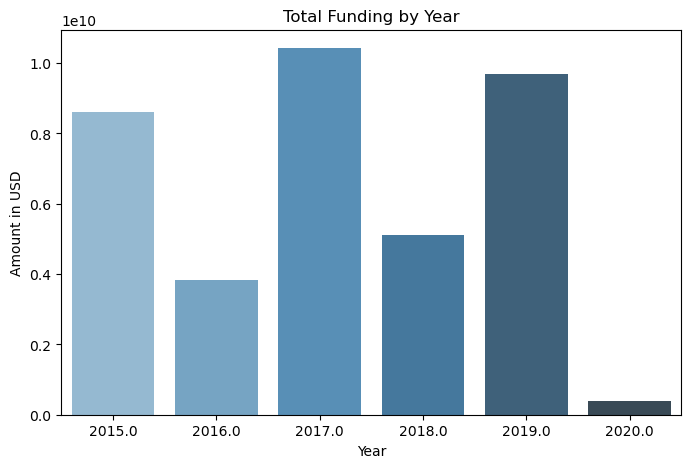

In [24]:
yearly_funding = df.groupby('Year')['Amount_USD'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Year', y='Amount_USD', data=yearly_funding, palette='Blues_d')
plt.title('Total Funding by Year')
plt.ylabel('Amount in USD')
plt.show()


In [25]:
yearly_funding

,Year,Amount_USD
0,2015.0,8.597207e+09
1,2016.0,3.828089e+09
2,2017.0,1.042931e+10
3,2018.0,5.116118e+09
4,2019.0,9.686577e+09
5,2020.0,3.902073e+08


### Most Funded Startups

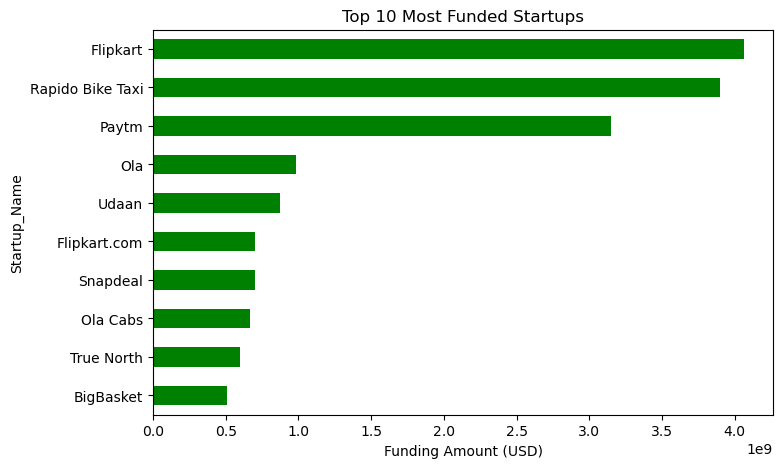

In [26]:
top_startups = df.groupby('Startup_Name')['Amount_USD'].sum().sort_values(ascending=False).head(10)

top_startups.plot(kind='barh', figsize=(8,5), color='green')
plt.xlabel('Funding Amount (USD)')
plt.title('Top 10 Most Funded Startups')
plt.gca().invert_yaxis()
plt.show()


In [27]:
top_startups

Startup_Name
Flipkart            4.059700e+09
Rapido Bike Taxi    3.900000e+09
Paytm               3.148950e+09
Ola                 9.845000e+08
Udaan               8.700000e+08
Flipkart.com        7.000000e+08
Snapdeal            7.000000e+08
Ola Cabs            6.697000e+08
True North          6.000000e+08
BigBasket           5.070000e+08
Name: Amount_USD, dtype: float64

### Funding by City

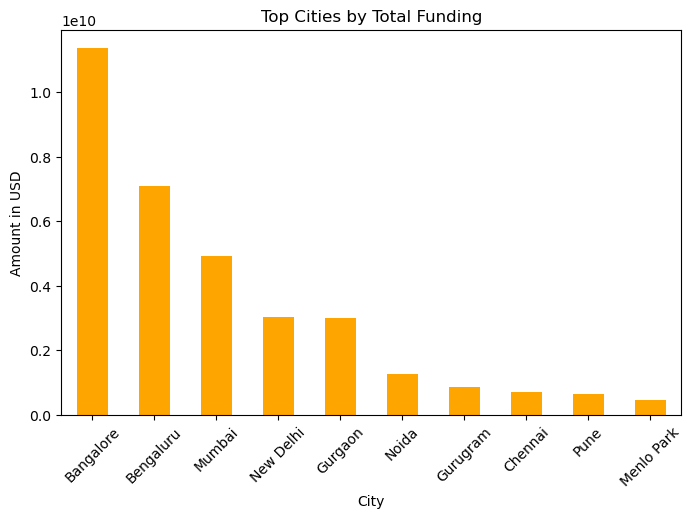

In [28]:
top_cities = df.groupby('City')['Amount_USD'].sum().sort_values(ascending=False).head(10)

top_cities.plot(kind='bar', figsize=(8,5), color='orange')
plt.title('Top Cities by Total Funding')
plt.ylabel('Amount in USD')
plt.xticks(rotation=45)
plt.show()


In [29]:
top_cities

City
Bangalore     1.136159e+10
Bengaluru     7.098579e+09
Mumbai        4.911805e+09
New Delhi     3.017817e+09
Gurgaon       3.005296e+09
Noida         1.262864e+09
Gurugram      8.659325e+08
Chennai       7.187670e+08
Pune          6.330820e+08
Menlo Park    4.500000e+08
Name: Amount_USD, dtype: float64

### Funding by Investment Type

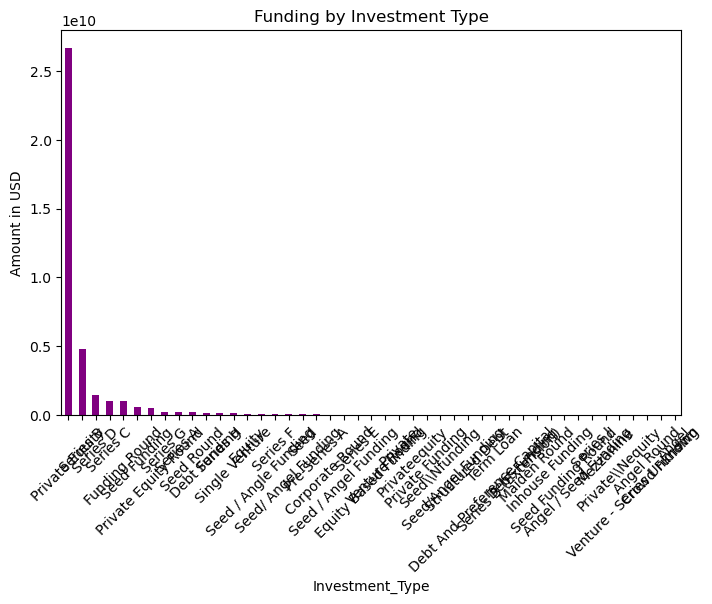

In [30]:
inv_type = df.groupby('Investment_Type')['Amount_USD'].sum().sort_values(ascending=False)

inv_type.plot(kind='bar', figsize=(8,5), color='purple')
plt.title('Funding by Investment Type')
plt.ylabel('Amount in USD')
plt.xticks(rotation=45)
plt.show()


In [31]:
inv_type

Investment_Type
Private Equity                 2.663607e+10
Series B                       4.799196e+09
Series D                       1.481799e+09
Series C                       1.044718e+09
Funding Round                  1.000000e+09
Seed Funding                   5.646483e+08
Private Equity Round           5.060000e+08
Series G                       2.310000e+08
Series A                       2.032000e+08
Seed Round                     1.958000e+08
Debt Funding                   1.509204e+08
Series H                       1.500000e+08
Single Venture                 1.400000e+08
Equity                         1.010000e+08
Seed / Angle Funding           1.003112e+08
Series F                       9.000000e+07
Seed/ Angel Funding            7.882681e+07
Seed                           5.280000e+07
Pre-Series A                   4.437200e+07
Corporate Round                3.808000e+07
Seed / Angel Funding           3.569317e+07
Series E                       3.300000e+07
Equity Based Fun

### Monthly Trend Over Time

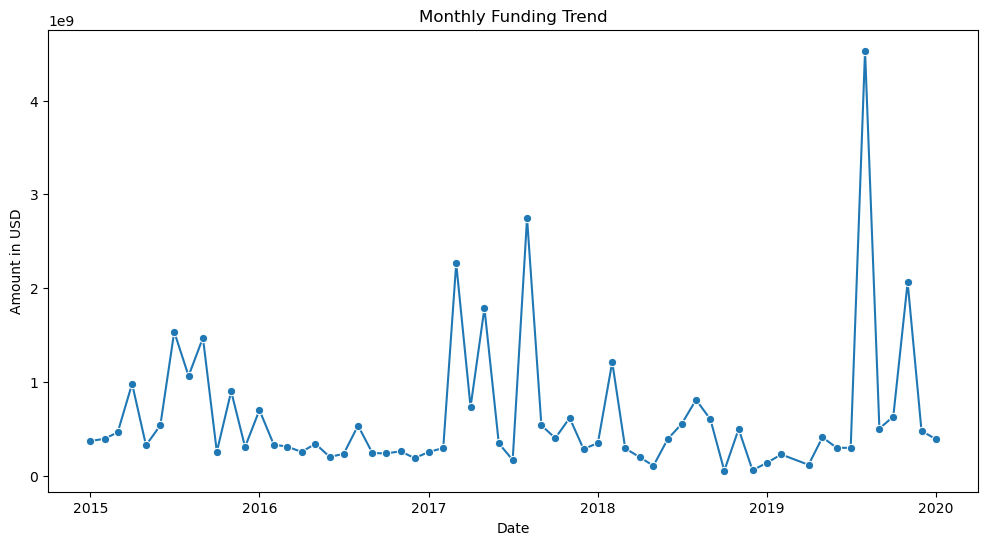

In [32]:
monthly = df.groupby([df['Date'].dt.to_period('M')])['Amount_USD'].sum().reset_index()
monthly['Date'] = monthly['Date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x='Date', y='Amount_USD', marker='o')
plt.title('Monthly Funding Trend')
plt.ylabel('Amount in USD')
plt.show()


In [33]:
monthly

,Date,Amount_USD
0,2015-01-01,3.693218e+08
1,2015-02-01,3.942626e+08
2,2015-03-01,4.633270e+08
3,2015-04-01,9.805000e+08
4,2015-05-01,3.241850e+08
5,2015-06-01,5.369940e+08
6,2015-07-01,1.534192e+09
7,2015-08-01,1.063816e+09
8,2015-09-01,1.470520e+09
9,2015-10-01,2.549610e+08


## KPI Calulations

To calculate key KPIs like LTV, CAC, Burn Rate, Run Rate, etc., from this startup funding dataset, few assumptions and derived columns have been made.

- Renamed 'Amount_USD' to 'Total_Investment'
- Renamed 'Startup_Name' to 'Unique_Startups'
- Simulate Monthly Revenue (e.g., 60% of total investment)
- Simulate Expenses (e.g., 70% of total investment)
- Simulate New Customers (e.g., 100 * unique startups)
- Simulate Marketing Spend (e.g., 10% of expenses)


In [40]:
# Group by month/year
monthly_df = df.groupby(['Year', 'Month']).agg({
    'Amount_USD': 'sum',
    'Startup_Name': 'nunique'
}).reset_index()

monthly_df.rename(columns={
    'Amount_USD': 'Total_Investment',
    'Startup_Name': 'Unique_Startups'
}, inplace=True)

In [41]:
monthly_df

,Year,Month,Total_Investment,Unique_Startups
0,2015.0,1.0,3.693218e+08,36
1,2015.0,2.0,3.942626e+08,42
2,2015.0,3.0,4.633270e+08,47
3,2015.0,4.0,9.805000e+08,51
4,2015.0,5.0,3.241850e+08,43
5,2015.0,6.0,5.369940e+08,58
6,2015.0,7.0,1.534192e+09,62
7,2015.0,8.0,1.063816e+09,65
8,2015.0,9.0,1.470520e+09,60
9,2015.0,10.0,2.549610e+08,59


In [42]:

# Simulate Monthly Revenue (e.g., 60% of total investment)
monthly_df['Revenue'] = monthly_df['Total_Investment'] * 0.6

# Simulate Expenses (e.g., 70% of total investment)
monthly_df['Expenses'] = monthly_df['Total_Investment'] * 0.7

# Simulate New Customers
monthly_df['New_Customers'] = monthly_df['Unique_Startups'] * 100

# Simulate Marketing Spend (e.g., 10% of expenses)
monthly_df['Marketing_Spend'] = monthly_df['Expenses'] * 0.1

In [43]:
monthly_df

,Year,Month,Total_Investment,Unique_Startups,Revenue,Expenses,New_Customers,Marketing_Spend
0,2015.0,1.0,3.693218e+08,36,2.215931e+08,2.585252e+08,3600,2.585252e+07
1,2015.0,2.0,3.942626e+08,42,2.365576e+08,2.759838e+08,4200,2.759838e+07
2,2015.0,3.0,4.633270e+08,47,2.779962e+08,3.243289e+08,4700,3.243289e+07
3,2015.0,4.0,9.805000e+08,51,5.883000e+08,6.863500e+08,5100,6.863500e+07
4,2015.0,5.0,3.241850e+08,43,1.945110e+08,2.269295e+08,4300,2.269295e+07
5,2015.0,6.0,5.369940e+08,58,3.221964e+08,3.758958e+08,5800,3.758958e+07
6,2015.0,7.0,1.534192e+09,62,9.205152e+08,1.073934e+09,6200,1.073934e+08
7,2015.0,8.0,1.063816e+09,65,6.382896e+08,7.446712e+08,6500,7.446712e+07
8,2015.0,9.0,1.470520e+09,60,8.823120e+08,1.029364e+09,6000,1.029364e+08
9,2015.0,10.0,2.549610e+08,59,1.529766e+08,1.784727e+08,5900,1.784727e+07


In [44]:
# CAC: Cost to acquire one customer
monthly_df['CAC'] = monthly_df['Marketing_Spend'] / monthly_df['New_Customers']

# Revenue per customer
monthly_df['Revenue_per_Customer'] = monthly_df['Revenue'] / monthly_df['New_Customers']

# LTV: Assume 12-month average lifespan
monthly_df['LTV'] = monthly_df['Revenue_per_Customer'] * 12

# Burn Rate: Net cash burn
monthly_df['Burn_Rate'] = monthly_df['Expenses'] - monthly_df['Revenue']

# LTV:CAC Ratio
monthly_df['LTV_CAC_Ratio'] = monthly_df['LTV'] / monthly_df['CAC']

In [45]:
monthly_df

,Year,Month,Total_Investment,Unique_Startups,Revenue,Expenses,New_Customers,Marketing_Spend,CAC,Revenue_per_Customer,LTV,Burn_Rate,LTV_CAC_Ratio
0,2015.0,1.0,3.693218e+08,36,2.215931e+08,2.585252e+08,3600,2.585252e+07,7181.256600,6.155363e+04,7.386435e+05,3.693218e+07,102.857143
1,2015.0,2.0,3.942626e+08,42,2.365576e+08,2.759838e+08,4200,2.759838e+07,6571.043333,5.632323e+04,6.758787e+05,3.942626e+07,102.857143
2,2015.0,3.0,4.633270e+08,47,2.779962e+08,3.243289e+08,4700,3.243289e+07,6900.614894,5.914813e+04,7.097775e+05,4.633270e+07,102.857143
3,2015.0,4.0,9.805000e+08,51,5.883000e+08,6.863500e+08,5100,6.863500e+07,13457.843137,1.153529e+05,1.384235e+06,9.805000e+07,102.857143
4,2015.0,5.0,3.241850e+08,43,1.945110e+08,2.269295e+08,4300,2.269295e+07,5277.430233,4.523512e+04,5.428214e+05,3.241850e+07,102.857143
5,2015.0,6.0,5.369940e+08,58,3.221964e+08,3.758958e+08,5800,3.758958e+07,6480.962069,5.555110e+04,6.666132e+05,5.369940e+07,102.857143
6,2015.0,7.0,1.534192e+09,62,9.205152e+08,1.073934e+09,6200,1.073934e+08,17321.522581,1.484702e+05,1.781642e+06,1.534192e+08,102.857143
7,2015.0,8.0,1.063816e+09,65,6.382896e+08,7.446712e+08,6500,7.446712e+07,11456.480000,9.819840e+04,1.178381e+06,1.063816e+08,102.857143
8,2015.0,9.0,1.470520e+09,60,8.823120e+08,1.029364e+09,6000,1.029364e+08,17156.066667,1.470520e+05,1.764624e+06,1.470520e+08,102.857143
9,2015.0,10.0,2.549610e+08,59,1.529766e+08,1.784727e+08,5900,1.784727e+07,3024.961017,2.592824e+04,3.111388e+05,2.549610e+07,102.857143


In [46]:
# Run Rate: Annualized revenue (from latest month)
latest_rev = monthly_df['Revenue'].iloc[-1]
run_rate = latest_rev * 12
latest_rev, run_rate

(np.float64(234124352.4), np.float64(2809492228.8))

### Summary

| Metric                   | How Calculated                    |
| ------------------------ | --------------------------------- |
| **CAC**                  | `Marketing Spend / New Customers` |
| **LTV**                  | `Revenue per Customer * 12`       |
| **Burn Rate**            | `Expenses - Revenue`              |
| **Run Rate**             | `Latest Monthly Revenue * 12`     |
| **Revenue per Customer** | `Revenue / New Customers`         |
| **LTV\:CAC**             | `LTV / CAC`                       |



In [47]:
monthly_df.to_csv("kpis_by_month.csv", index=False)